# MultiNest sampling

This example demonstrates how to use MultiNest sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "MultiNest: an efficient and robust Bayesian inference tool for cosmology and particle physics."
Feroz, F., M. P. Hobson, and M. Bridges. Monthly Notices of the Royal Astronomical Society 398.4 (2009): 1601-1614.

First create fake data.

In [1]:
import os
os.chdir("../..")
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

pints/__init__.py:234: UserWarning: No-U-Turn sampler unsupported for Python version < 3.3
  warnings.warn('No-U-Turn sampler unsupported for Python version < 3.3')


Create the nested sampler that will be used to sample from the posterior.

In [17]:
# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.MultinestSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

sampler._sampler.set_f_s_threshold(4)

Run the sampler!

In [18]:
samples = sampler.run()
print('Done!')

Running MultiNest sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate Ellipsoid count
0     1       0:00.0 -inf          1               0             
0     2       0:00.0 -inf          1               0             
0     21      0:00.0 -inf          1               0             
0     41      0:00.0 -inf          1               0             
0     61      0:00.0 -inf          1               0             
0     81      0:00.0 -inf          1               0             
0     101     0:00.0 -inf          1               0             
0     121     0:00.0 -inf          1               0             
0     141     0:00.0 -inf          1               0             
0     161     0:00.0 -inf          1               0             
0     181     0:00.0 -inf          1               0             
0     201     0:00.0 -inf          1               0             
0     221     

2120  3984    0:14.9 -127.083523   0.591517857     1             
2140  4016    0:14.9 -125.6463832  0.591814159292  1             
2160  4040    0:14.9 -124.0481053  0.593406593     1             
2180  4072    0:14.9 -122.8628834  0.593681917     1             
2200  4099    0:15.1 -121.4200228  0.594755339     1             
2220  4124    0:15.1 -119.7072038  0.59613319      1             
2240  4151    0:15.1 -117.8940298  0.597174087     1             
2260  4181    0:15.2 -116.5138813  0.597725469     1             
2280  4209    0:15.2 -115.2407696  0.598582305     1             
2300  4241    0:15.2 -113.810297   0.598802395     1             
2320  4282    0:15.2 -116.1123382  0.597630088     1             
2340  4318    0:15.3 -114.7211699  0.597243492     1             
2360  4360    0:15.3 -113.292026   0.595959596     1             
2380  4393    0:15.3 -111.6447466  0.596043075     1             
2400  4429    0:16.1 -110.4273092  0.59568131      5             
2420  4462

4780  8057    0:21.1 -10.18113006  0.624265378     1             
4800  8090    0:21.2 -9.890854072  0.624187256     1             
4820  8113    0:21.2 -9.90239911   0.624918968     1             
4840  8137    0:21.3 -9.617622792  0.625565465     1             
4860  8161    0:21.3 -9.348556798  0.626207963     1             
4880  8188    0:21.3 -9.079915597  0.626605033     1             
4900  8213    0:21.3 -8.821492875  0.627159862     1             
4920  8242    0:21.4 -8.565604597  0.627390972     1             
4940  8268    0:21.4 -8.312289772  0.627859685     1             
4960  8299    0:21.4 -8.054707318  0.627927586     1             
4980  8337    0:21.4 -7.807630755  0.627441099     1             
5000  8367    0:21.6 -7.57861608   0.627588804     1             
5020  8393    0:21.7 -7.348503379  0.628049543     1             
5040  8419    0:21.7 -7.16783527   0.628507295174  1             
5060  8445    0:21.7 -6.947820681  0.628962088     1             
5080  8465

## Plot posterior samples versus true parameter values (dashed lines)

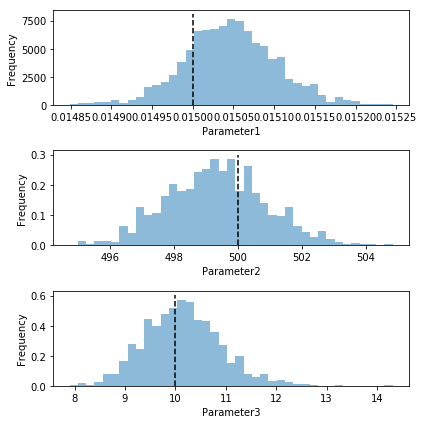

In [19]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=real_parameters)

plt.show()

## Plot posterior predictive simulations versus the observed data

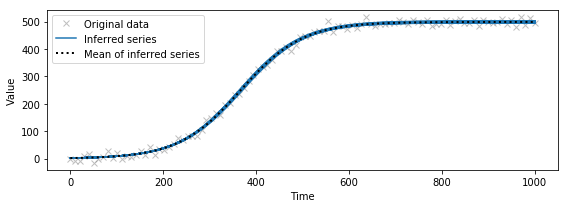

In [20]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [21]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -386.455975746 ± 0.0826647217674


## Effective sample size

In [22]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1620.00734244


# Egg box problem

In [8]:
class ExampleToy(pints.LogPDF):
    def __init__(self, sigma, r):
        self._sigma = sigma
        self._r = r
        self._log_toy = pints.toy.SimpleEggBoxLogPDF(self._sigma, self._r)

    def __call__(self, x):
        x1 = np.copy(x)
        x1[0] = -15 + 30 * x[0]
        x1[1] = -15 + 30 * x[1]
        return self._log_toy(x1)

    def n_parameters(self):
        return 2

In [9]:
log_pdf = ExampleToy(2, 4)
log_prior = pints.UniformLogPrior(
    [0.0, 0.0],
    [1.0, 1.0])

In [10]:
sampler = pints.NestedController(log_pdf, log_prior, method=pints.MultinestSampler)

# Set number of iterations
sampler.set_iterations(1000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(500)

sampler._sampler.set_f_s_threshold(1.3)

In [11]:
samples = sampler.run()
print('Done!')

Running MultiNest sampler
Number of active points: 400
Total number of iterations: 1000
Total number of posterior samples: 500
Iter. Eval. Time m:s Delta_log(z) Acceptance rate Ellipsoid count
0     1       0:00.0 -inf          1               0             
0     2       0:00.0 -inf          1               0             
0     21      0:00.0 -inf          1               0             
0     41      0:00.0 -inf          1               0             
0     61      0:00.0 -inf          1               0             
0     81      0:00.0 -inf          1               0             
0     101     0:00.0 -inf          1               0             
0     121     0:00.0 -inf          1               0             
0     141     0:00.0 -inf          1               0             
0     161     0:00.0 -inf          1               0             
0     181     0:00.1 -inf          1               0             
0     201     0:00.1 -inf          1               0             
0     221     0

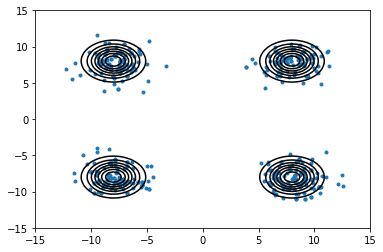

In [12]:
sigma = 2
r = 4
log_pdf = pints.toy.SimpleEggBoxLogPDF(sigma, r)

# Contour plot of pdf
levels = np.linspace(-100, 0, 20)
x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
Z = [[np.exp(log_pdf([i, j])) for i in x] for j in y]

plt.figure()
plt.contour(X, Y, Z, colors='k')
plt.scatter(-15 + 30 * samples[:, 0], -15 + 30 * samples[:, 1], marker='.')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

In [13]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 671.948137164


In [14]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -5.4031788594 ± 0.0681070765808
